# Name:Ali Nahle
# Tp3: MultiClass Logistic Regression

### Importing packages and loading the dataset

In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from numpy import *
n_class = 10
X,y = load_digits(n_class=n_class , return_X_y=True)

### Exploring X and y

In [2]:
print(y)

[0 1 2 ... 8 9 8]


In [3]:
print(X.shape)

(1797, 64)


In [4]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.33, random_state=42)

### Helper Functions

In [5]:
def oneHotEncodage(y):
    values = array(y)

    onehot_encoder = OneHotEncoder(sparse=False)
    values = values.reshape(len(values), 1)
    onehot_encoded = onehot_encoder.fit_transform(values)
    return onehot_encoded

cette fonction fera le codage one-hot pour le tableau y, et le transformera en 2d tableaux de taille (len(y),n_classes),où chaque tableau contient les probabilités d'appartenance à une classe.

par exemple : si la valeur initiale était 2 (la classe est 2 ), cette fonction le transformera en un tableau de zéros où seul array[2]=1.

In [6]:
def softmax(z):
    z -= np.max(z)
    return np.exp(z) / np.sum(np.exp(z), axis=1).reshape(-1,1)


la fonction softmax appliquera l'équation de softmax (probabilité d'être dans chaque classe) qui a été énoncée dans la classe. 
L'équation est :

In [7]:
def get_prob_pred(X,W):
    z=X@np.transpose(W)
    probs=softmax(z)
    preds=np.zeros(len(probs))
    for i in range(len(probs)):
        preds[i]=np.where(probs[i]==[np.amax(probs[i])])[0][0]
    return probs , preds

cette fonction récupère les probabilités de la fonction softmax et les transforme en un tableau de 1d où la valeur de chaque indice i est (indice de max(probs[i])).

In [8]:
def score(yhat, y):
        return (np.mean(yhat== y))*100

cette fonction compare nos prédictions avec y et renvoie la précision

In [9]:
def get_loss_grad(W,X,y,lam):
    # convert the integer class coding into a one hot representation
    scores = X@np.transpose(W) # compute raw class scores given our input and current weights
    prob = softmax(scores) # perform a softmax on these scores to get their probabilities
    loss=0
    grad=np.zeros(shape=(10,X.shape[1]))
    loss=np.mean(y_mat * np.log(prob+0.00001))+(lam/2)*(W*W).sum()
    grad=np.dot(np.transpose(prob-y_mat),X)+ lam*W
#     for i in range(10):
#         for j in range(X.shape[0]):
#             loss+=y_mat[j][i]*np.log(prob[j][i]+0.000001)
            #grad[i]+=X[j]*(prob[j][i]-y_mat[j][i])
            
          
    return -loss , grad


la fonction ci-dessus calcule à la fois la perte et le gradient en utilisant les formules suivantes :

la fonction de perte est :

$$L = -\frac{1}{n} \sum\limits_{i=1}^{n}\sum\limits_{j=1}^{C} y_{i,j}\log(p_{i,j})$$

where:
- n est le nombre d’instances d’apprentissage
- C est le nombre de classes
-  $p_{i,k} $ est la probabilité de l’instance i d’appartenir à la classe k exprimé par la fonction softmax.

Maintenant, le gradient est calculé comme suit :
$$\nabla_{W_k} L = -\frac{1}{n} \sum\limits_{i=1}^{n}\sum\limits_{j=1}^{C}y_{i,j} \frac{1}{p_{i,j}} \frac{\partial p_{i,j}}{\partial z_{i,k}} \frac{\partial z_{i,k}}{\partial W_{k}} $$

nous devons résoudre ces deux équations :
- $ \frac{\partial p_{i,j}}{\partial z_{i,k}}$ 
- $ \frac{\partial z_{i,k}}{\partial W_{k}} $

où le $ \frac{\partial z_{i,k}}{\partial W_{k}} $ = $ {x_{i}} $

Mais $ \frac{\partial p_{i,j}}{\partial z_{i,k}}$  a 2 cas : quand $j \neq k$(1) et quand j = k (2).

the first case : quand $j \neq k$ (1) :
$ \frac{\partial p_{i,j}}{\partial z_{i,k}}$ = $$ \frac{\partial}{\partial z_{i,k}} \frac{ exp(z_{i,j})}{\sum_k\exp(z_k)} 
= \frac{0 * \sum_k\exp(z_k) - exp(z_{i,j}) \exp(z_{i,k}) ) }{\left(\sum_k\exp(z_k)\right)^2} 
\\ = \frac{ - \exp(z_{i,j}) }{\sum_k\exp(z_k)} \frac{ \exp(z_{i,k}) }{\sum_k\exp(z_k)}
\\ = - p_{i,j} p_{i,k}$$


the second case: quand j = k (2): 
$ \frac{\partial p_{i,j}}{\partial z_{i,k}}$ = $$ \frac{\partial}{\partial z_{i,k}} \frac{ exp(z_{i,j})}{\sum_k\exp(z_k)} 
= \frac{\exp(z_{i,j}) * \sum_k\exp(z_i) - exp(z_{i,j}) \exp(z_{i,j}) ) }{\left(\sum_k\exp(z_k)\right)^2} 
\\= \frac{\exp(z_{i,j}) * \sum_k\exp(z_i)}{{\left(\sum_k\exp(z_k)\right)^2}}-\frac{exp(z_{i,j}) \exp(z_{i,j})}{{\left(\sum_k\exp(z_k)\right)^2}} 
\\= \frac{\exp(z_{i,j})}{{\sum_k\exp(z_k)}} - \frac{\left(\exp(z_{i,j})\right)^2}{{\left(\sum_k\exp(z_k)\right)^2}}
\\= p_{i,k} - \left((p_{i,k}) \right)^2 
\\=p_{i,k} (1-p_{i,k}) $$

maintenant on a:

$$\nabla_{W_k} L = -\frac{1}{n} \sum\limits_{i=1}^{n}x_{i} ((2)+\sum\limits_{j=1, j \neq k}^{C}(1)) 
\\= -\frac{1}{n} \sum\limits_{i=1}^{n} x_{i} (y_{i,k}-p_{i,k}) $$


et pour minimiser la fonction de cout on ajoute un terme de regularization (lam/2)* W^2 au cout et lam*W(derive) sur la fonction de gradient 

In [10]:
def CalculateW(nb_epochs,X,y,lam):
    W=np.zeros(shape=(10,X.shape[1]+1))
    X1= np.ones((X.shape[0],X.shape[1]+1))
    X1[:,:-1] = X
    loss=np.zeros(nb_epochs)
    for epoch in range(nb_epochs):
        
        loss[epoch],grad=get_loss_grad(W,X1,y,lam)
        W=W-(lam*grad)
#         for i in range(10):
#             W[i]=W[i]-grad[i]*lam*loss[epoch]
    loss[epoch],grad=get_loss_grad(W,X1,y,lam)
    probs,preds=get_prob_pred(X1,W) 
    return W,loss,probs,preds
        

cette fonction prend comme paramètres nb_epochs X y et lam(learning_rate), puis génère les poids comme des zéros au début, et ensuite dans la boucle, nous calculons la perte et le grad de ces poids, mettre à jour les poids en fonction de cette formule : 

W=W-(lambda*grad)

et la fonction nous renvoie les poids, un tableau qui suit la perte, nos prédictions (probabilités et prédictions de classe).



In [11]:
y_mat = oneHotEncodage(y_train)
W,loss,probs,preds=CalculateW(1000,X_train,y_mat,0.00001)

In [12]:
score(preds,y_train)

99.66749792186201

C'est le score que nous avons obtenu (précision)99.66%, et on reste a un erreur de 0.33%

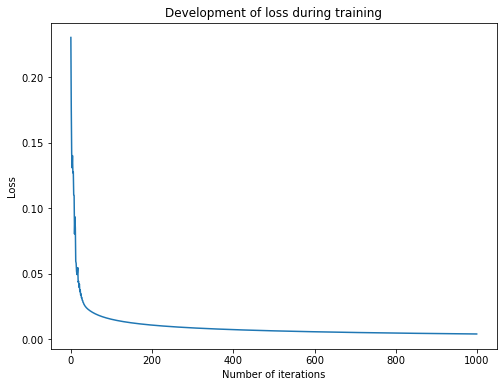

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(len(loss)), loss)
plt.title("Development of loss during training")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

precision=  100.0


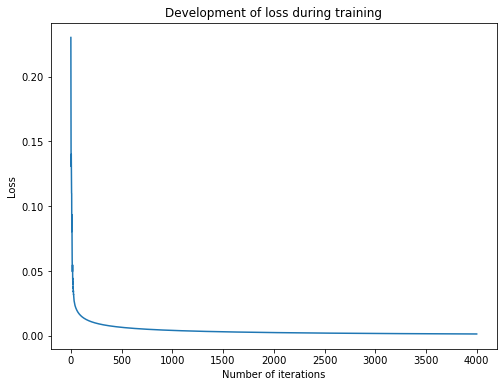

In [14]:

W1,loss1,probs1,preds1=CalculateW(4000,X_train,y_mat,0.00001)
print("precision= ",score(preds1,y_train))
fig = plt.figure(figsize=(8,6))
plt.plot(np.arange(len(loss1)), loss1)
plt.title("Development of loss during training")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.show()

here we tried 4000 iterations(we tried 1000 before on the same lambda=0.0001) to find the best weights and we got an accuracy on the training of 100%, so we will see which of them will have the best results on testing

# Testing

après avoir prédit  les données d'apprentissage, nous verrons comment notre algorithme se comportera face à de nouvelles données (données de test).

In [15]:
X1_test= np.ones((X_test.shape[0],X_test.shape[1]+1))
X1_test[:,:-1] = X_test
#we added a columns of 1's to the X_test
prob_test,pred_test=get_prob_pred(X1_test,W)
score(pred_test,y_test)

96.8013468013468

Notre algorithme a correctement prédit 96,8% des nouvelles images, ce qui est un bon taux de précision, lorsque iteration=1000 et lambda=0.0001.

In [16]:
prob_test,pred_test=get_prob_pred(X1_test,W1)
score(pred_test,y_test)

96.8013468013468

ici, on a vu que nb d'itération=4000 est mieux que 1000, parce que sa précision sur les données d'aprentissage est 100%, alors que leur précision sur l'ensemble de test était la même.